In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [66]:
cancer_data = pd.read_csv(r"Cancer Risk perdiction dataset\cancer patient data sets.csv")
cancer_data.iloc[:,10:].head()
#Numatical Dataset with 26 columns

,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [67]:
print(len(cancer_data.columns))
print(cancer_data.columns)

26
Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [68]:
#Replacing Prediction output(Column: Level) to numeric values and removing wanted columns
cancer_data = cancer_data.drop(['index','Patient Id',],axis=1)
cancer_data['Level'] = cancer_data['Level'].replace({'Low':1,'Medium':2,'High':3})
risk_level = ['Low','Medium','High']
cancer_data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [69]:
#Checking for NAN values
cancer_data.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<AxesSubplot:ylabel='Density'>

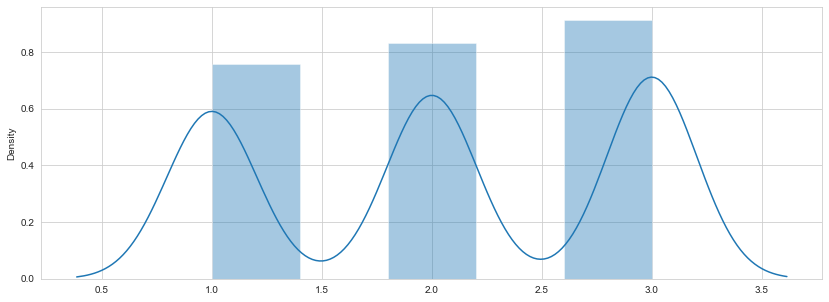

In [70]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(cancer_data,x=cancer_data['Level'])

<AxesSubplot:xlabel='Air Pollution', ylabel='Level'>

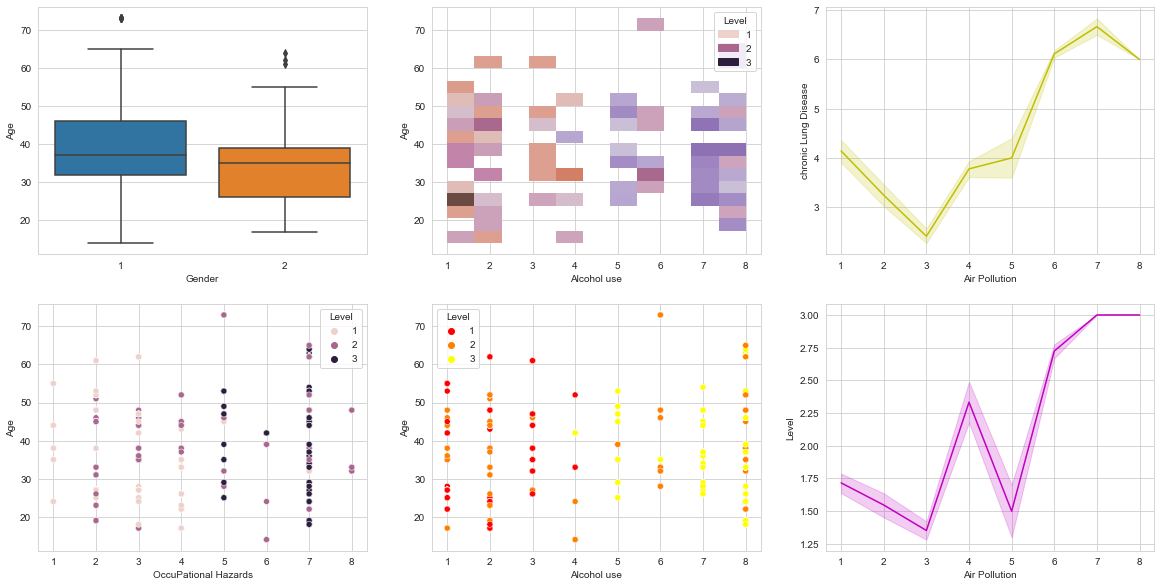

In [71]:
#visualizing data 
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('whitegrid')
sns.boxplot(x=cancer_data['Gender'],y=cancer_data['Age'],ax=ax[0,0])
sns.histplot(x=cancer_data['Alcohol use'],y=cancer_data['Age'],ax=ax[0,1], hue=cancer_data['Level'])
sns.scatterplot(x=cancer_data['OccuPational Hazards'],y=cancer_data['Age'],ax=ax[1,0],hue=cancer_data['Level'])
sns.scatterplot(x=cancer_data['Alcohol use'],y=cancer_data['Age'],ax=ax[1,1],hue=cancer_data['Level'],palette='autumn')
sns.lineplot(x=cancer_data['Air Pollution'],y=cancer_data['chronic Lung Disease'],ax=ax[0,2],color='y')
sns.lineplot(x=cancer_data['Air Pollution'],y=cancer_data['Level'],ax=ax[1,2],color='m')

In [72]:
# Separting data to X and Y(Input and outcome)

In [73]:
#for i in range(1,24):
    #print(cancer_data.iloc[:,i].unique())
cancer_data = cancer_data.sort_values(by='Level')
cancer_data.info()
cancer_data.head()
cancer_data.tail()
X = cancer_data.iloc[:,:23]
Y = cancer_data.iloc[:,23]
X.head()
Y.head()
cancer_data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [74]:
#Splitting model to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,random_state=10,test_size=0.25)

In [75]:
#Using SVM classification Algorithm
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',C=1E10)

In [76]:
svc_model.fit(xTrain,yTrain)

SVC(C=10000000000.0, kernel='linear')

In [77]:
svc_model_predict = svc_model.predict(xTest)
print('Model Acc:',svc_model.score(xTest,yTest)*100,'%')

Model Acc: 100.0 %


In [78]:
#Manual Predition
test_data = np.array(cancer_data.iloc[350,:23]).reshape(1,-1)
print("SVM Classifire:",round(svc_model.predict(test_data)[0]),'\n',cancer_data.iloc[350,23])

SVM Classifire: 2 
 2


In [229]:
#Trying Kmeans Clustring
#Finding Cluster size using Elbow method
#Creating a binary classification for better result 
cancer_data_binary_class = cancer_data[cancer_data.Level !=2]
cancer_data_binary_class.head()
X_bin = cancer_data_binary_class.drop('Level',axis=1)
Y_bin = cancer_data_binary_class['Level']
x_train,x_test,y_train,y_test = train_test_split(X_bin,Y_bin,random_state=40,test_size=1/4)

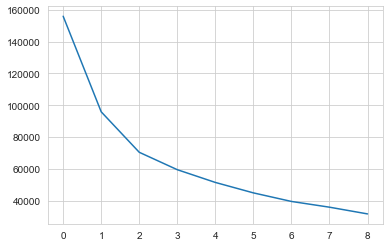

In [230]:
from sklearn.cluster import KMeans
#finding cluster size
data = []
for i in range(1,10):
    kmc = KMeans(n_clusters=i)
    kmc.fit(X_bin,Y_bin)
    data.append(kmc.inertia_)
plt.plot(data)

In [241]:
kmc_model = KMeans(n_clusters=2)

In [242]:
kmc_model.fit(x_train,y_train)

KMeans(n_clusters=2)

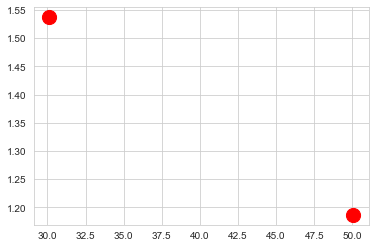

In [243]:
kmc_y_predict = kmc_model.predict(x_test)
plt.scatter(kmc_model.cluster_centers_[:, 0], kmc_model.cluster_centers_[:, 1], s = 200, c = 'red')

Accuracy_score: 0.32934131736526945 
Classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      0.47      0.57       117
           3       0.00      0.00      0.00         0

    accuracy                           0.33       167
   macro avg       0.24      0.16      0.19       167
weighted avg       0.50      0.33      0.40       167
 
Confusion_matrix:
 [[ 0 22 28]
 [ 0 55 62]
 [ 0  0  0]]


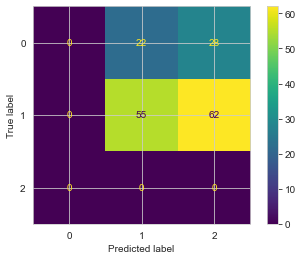

In [244]:
print('Accuracy_score:',accuracy_score(kmc_y_predict,y_test),'\nClassification_report:\n',classification_report(kmc_y_predict,y_test),'\nConfusion_matrix:\n',confusion_matrix(kmc_y_predict,y_test))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(kmc_y_predict,y_test))
matrix_plot.plot()

# model failed due to under fitting

In [245]:
#using decisoin treeabsfrom sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dec_entro = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=5,min_samples_leaf=12)
dec_gini = DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=5,min_samples_leaf=12)

In [251]:
dec_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, random_state=10)

In [252]:
y_pred_gini = dec_gini.predict(x_test)

In [253]:
print("acc score(gini):",accuracy_score(y_test,y_pred_gini),'\nconf mat(gini):\n',
      confusion_matrix(y_test,y_pred_gini),'\n',
     '\nclass report(gini):\n',classification_report(y_test,y_pred_gini))

acc score(gini): 0.9520958083832335 
conf mat(gini):
 [[69  8]
 [ 0 90]] 
 
class report(gini):
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        77
           3       0.92      1.00      0.96        90

    accuracy                           0.95       167
   macro avg       0.96      0.95      0.95       167
weighted avg       0.96      0.95      0.95       167



In [261]:
#Manual Predition
test_data = np.array(cancer_data.iloc[10,:23]).reshape(1,-1)
print("Dec Gini Classification:",(dec_gini.predict(test_data)[0]),'\n','Actual Prediction',cancer_data.iloc[10,23])
#Decission Tree Classifire gave good output with accuracy of 97% in both critation 

Dec Gini Classification: 1 
 Actual Prediction 1


In [95]:
#using Logistric Regression

In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [97]:
log_reg.fit(xTrain,yTrain)

LogisticRegression()

In [262]:
print(log_reg.score(xTest,yTest)*100,'%')

98.8 %


In [263]:
#Using SMV regressor
from sklearn.svm import SVR
svr_model = SVR(kernel='poly')
svr_model.fit(xTrain,yTrain)
print(svr_model.score(xTest,yTest)*100,'%')

92.8196848146008 %


In [99]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression()

In [100]:
liner_model.fit(xTrain,yTrain)

LinearRegression()

In [101]:
print(liner_model.score(xTest,yTest)*100,'%')

91.91728571590903 %


In [102]:
#Manual Predition
test_data = np.array(cancer_data.iloc[350,:23]).reshape(1,-1)
print('Actual Prediction:',cancer_data.iloc[350,23])
print("Linear Regression:",round(liner_model.predict(test_data)[0]),'\nLogistric Regression:',log_reg.predict(test_data)[0])

Actual Prediction: 2
Linear Regression: 2 
Logistric Regression: 2


Using Different algorithams it seems like Regression working good with this dataset 
and "Logistric Regression" have high accuracy upto 98.8% followed by SVR with 92.8%

Classification algorithams K-Means have <50% acc so the model is failed using under fitting
Decession Tree with 2 features using gini critation have 95% of accuracy which can predict LOW and High risk condtion